In [1]:
import pandas as pd
import numpy as np
import socket
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importing "IpAddress_to_Country.csv"
ip = pd.read_csv('IpAddress_to_Country.csv')

# Importing "Fraud_Data.csv"
fraud = pd.read_csv('Fraud_Data.csv')

# Importing "Blacklisted_IP.csv"
bip = pd.read_csv('Blacklisted_IP.csv')

display(ip.head(2))
display(fraud.head(2))
display(bip.head(2))

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0


,Blacklisted IP_Address
0,1.0.136.29
1,1.0.136.215


In [3]:
# Below code will check the IP address range in the "Fraud_Data.csv" dataset and match it with the corresponding country in the "IpAddress_to_Country.csv" dataset, to create a new dataset "Fraud_Data_With_Country.csv" that includes the country information.
"""
def get_country(ip_address):
    matches = ip[(ip_address >= ip["lower_bound_ip_address"]) & (ip_address <= ip["upper_bound_ip_address"])]
    if len(matches) == 0:
        return "Unknown"
    else:
        country = matches.iloc[0]["country"]
        return country
fraud["country"] = fraud["ip_address"].apply(get_country)
fraud.insert(len(fraud.columns)-2, "country", fraud.pop("country"))
fraud.to_csv("Fraud_Data_With_Country.csv", index=False)
"""

# Importing "Fraud_Data_With_Country.csv"
df = pd.read_csv('Fraud_Data_With_Country.csv')

# Converting the IP Address into Quad Dot Format
df['ip_address'] = df['ip_address'].astype(int).apply(lambda x: socket.inet_ntoa((x).to_bytes(4, byteorder='big')))

# Checking if the IP in 'Fraud_Data.csv' is Blacklisted in Real World or Not using "Blacklisted_IP.csv" dataset.
df['blacklisted'] = df['ip_address'].isin(bip['Blacklisted IP_Address']).astype(int)
df = df.reindex(columns=['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'country', 'ip_address', 'blacklisted', 'class'])

# Below data includes all merged data from 3 csv's and no preprocessing is performed, used to pass to models and test scores 
df.to_csv('Without_Best_Features_Final_Fraud_Data.csv', index=False)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,country,ip_address,blacklisted,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,Japan,43.173.1.96,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,United States,20.225.83.219,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,United States,156.64.132.28,0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,Unknown,228.234.6.235,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,United States,24.197.75.141,0,0


### Exploratory Data Analysis (EDA) and Preprocessing

In [4]:
print("----------------Metadata-------------------")
print(df.shape)
print(" ")

print("----------------Check for missing values------------------")
print(df.isna().sum())
print(" ")

print("----------------Unknown Country------------------")
(df['country'] == "Unknown").sum()


----------------Metadata-------------------
(151112, 13)
 
----------------Check for missing values------------------
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
country           0
ip_address        0
blacklisted       0
class             0
dtype: int64
 
----------------Unknown Country------------------


21966

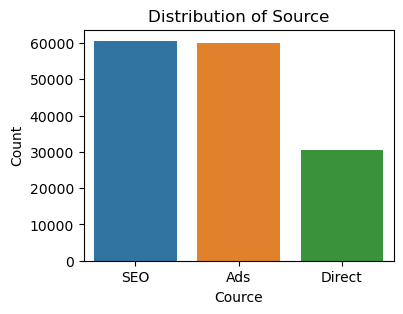

In [5]:
plt.figure(figsize=(4, 3))
sns.countplot(x = "source", data=df)
plt.xlabel("Cource")
plt.ylabel("Count")
plt.title("Distribution of Source")
plt.show()

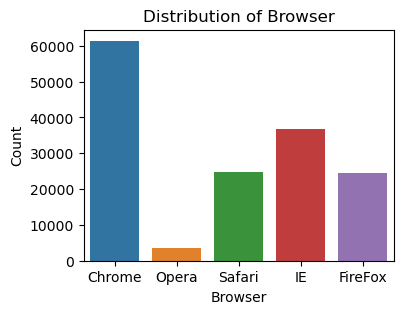

In [6]:
plt.figure(figsize=(4, 3))
sns.countplot(x = "browser", data=df)
plt.xlabel("Browser")
plt.ylabel("Count")
plt.title("Distribution of Browser")
plt.show()

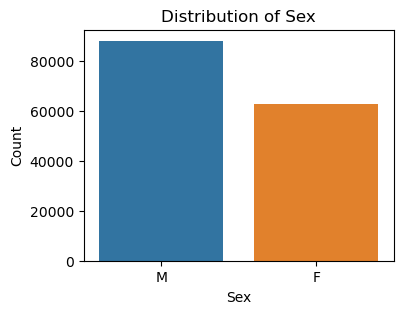

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(x = "sex", data=df)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.show()

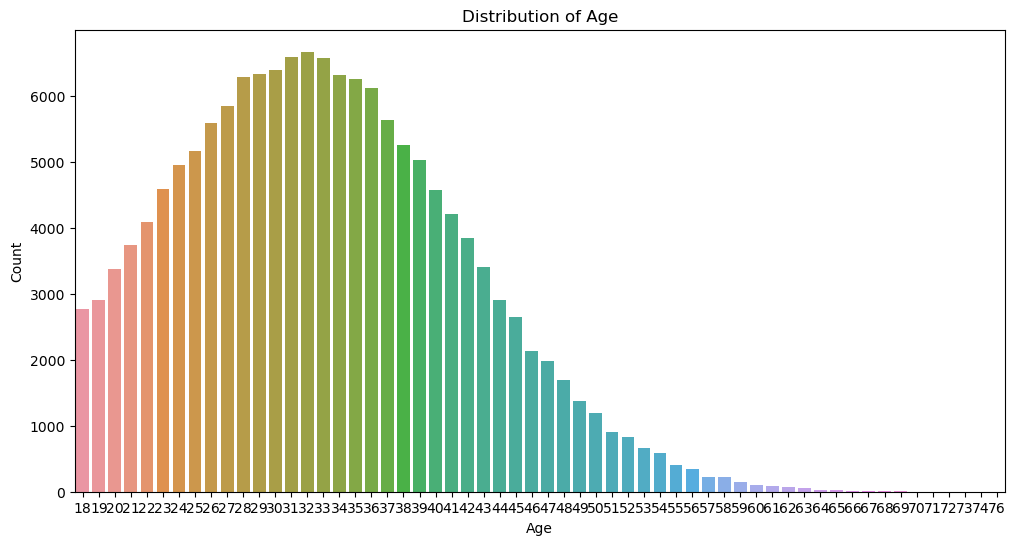

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x = "age", data=df)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

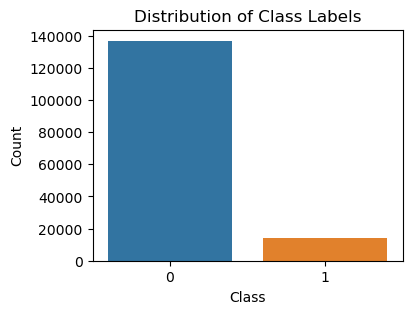

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x = "class", data=df)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class Labels")
plt.show()

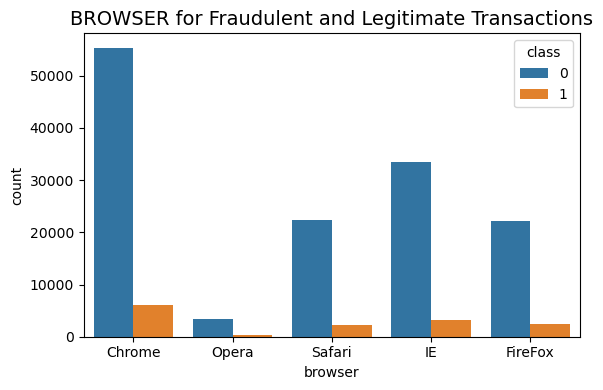

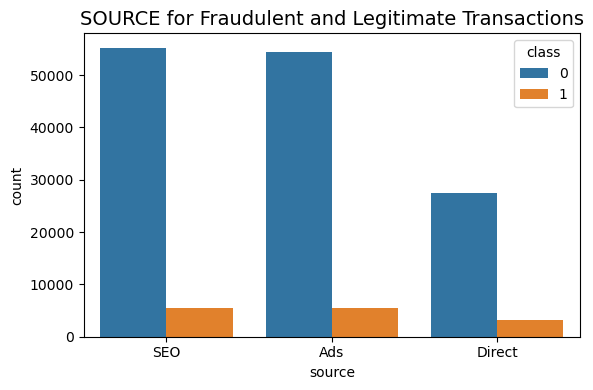

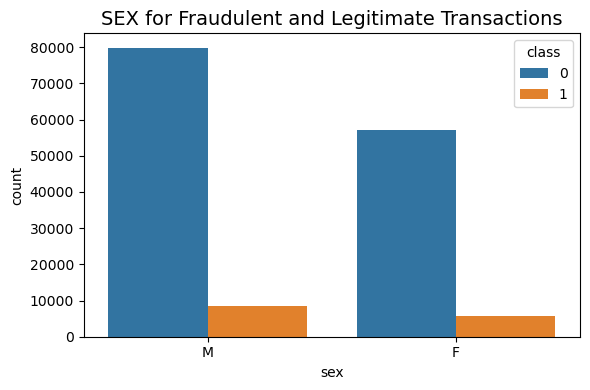

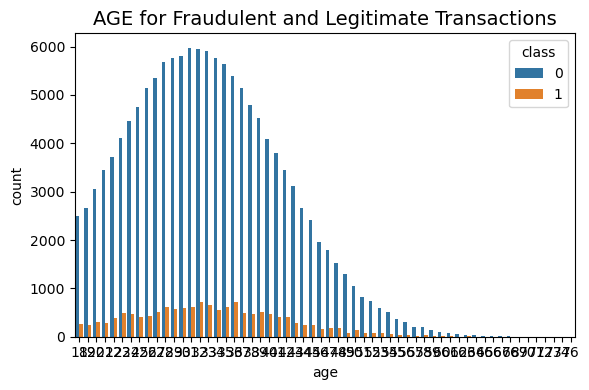

In [10]:
def fraud_no_fraud_chart(col):
    fig, ax = plt.subplots(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=fraud, ax=ax)
    ax.set_title(col.upper() + " for Fraudulent and Legitimate Transactions",fontsize=14)
    plt.tight_layout()
    plt.show()
fraud_no_fraud_chart('browser')
fraud_no_fraud_chart('source')
fraud_no_fraud_chart('sex')
fraud_no_fraud_chart('age')

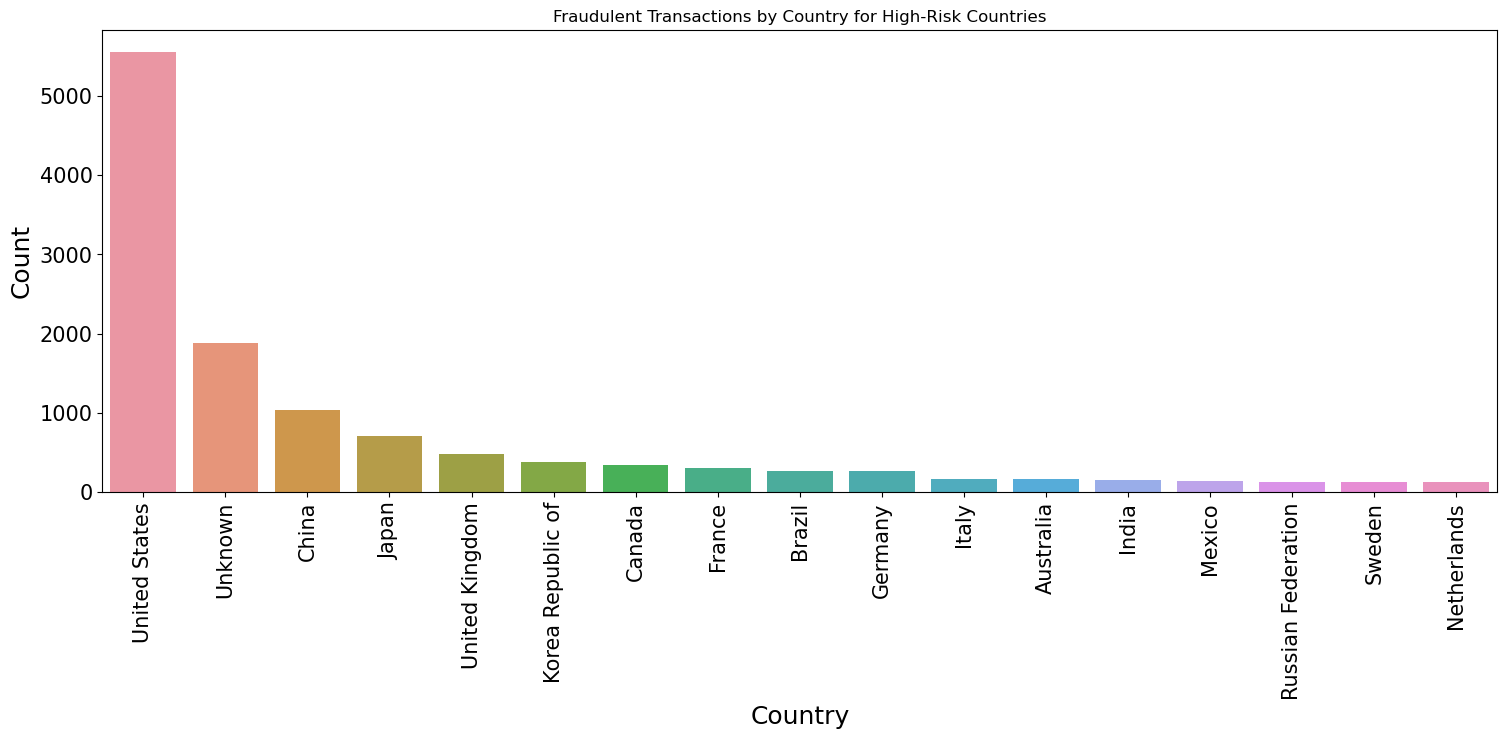

In [11]:
plt.figure(figsize=(18,6))
fraudulent_countries = df[df['class']==1]['country'].value_counts()
countries_to_plot = fraudulent_countries[fraudulent_countries > 100].index.tolist()
sns.countplot(x='country', data=df[(df['class']==1)&(df['country'].isin(countries_to_plot))], order=countries_to_plot)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fraudulent Transactions by Country for High-Risk Countries")
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

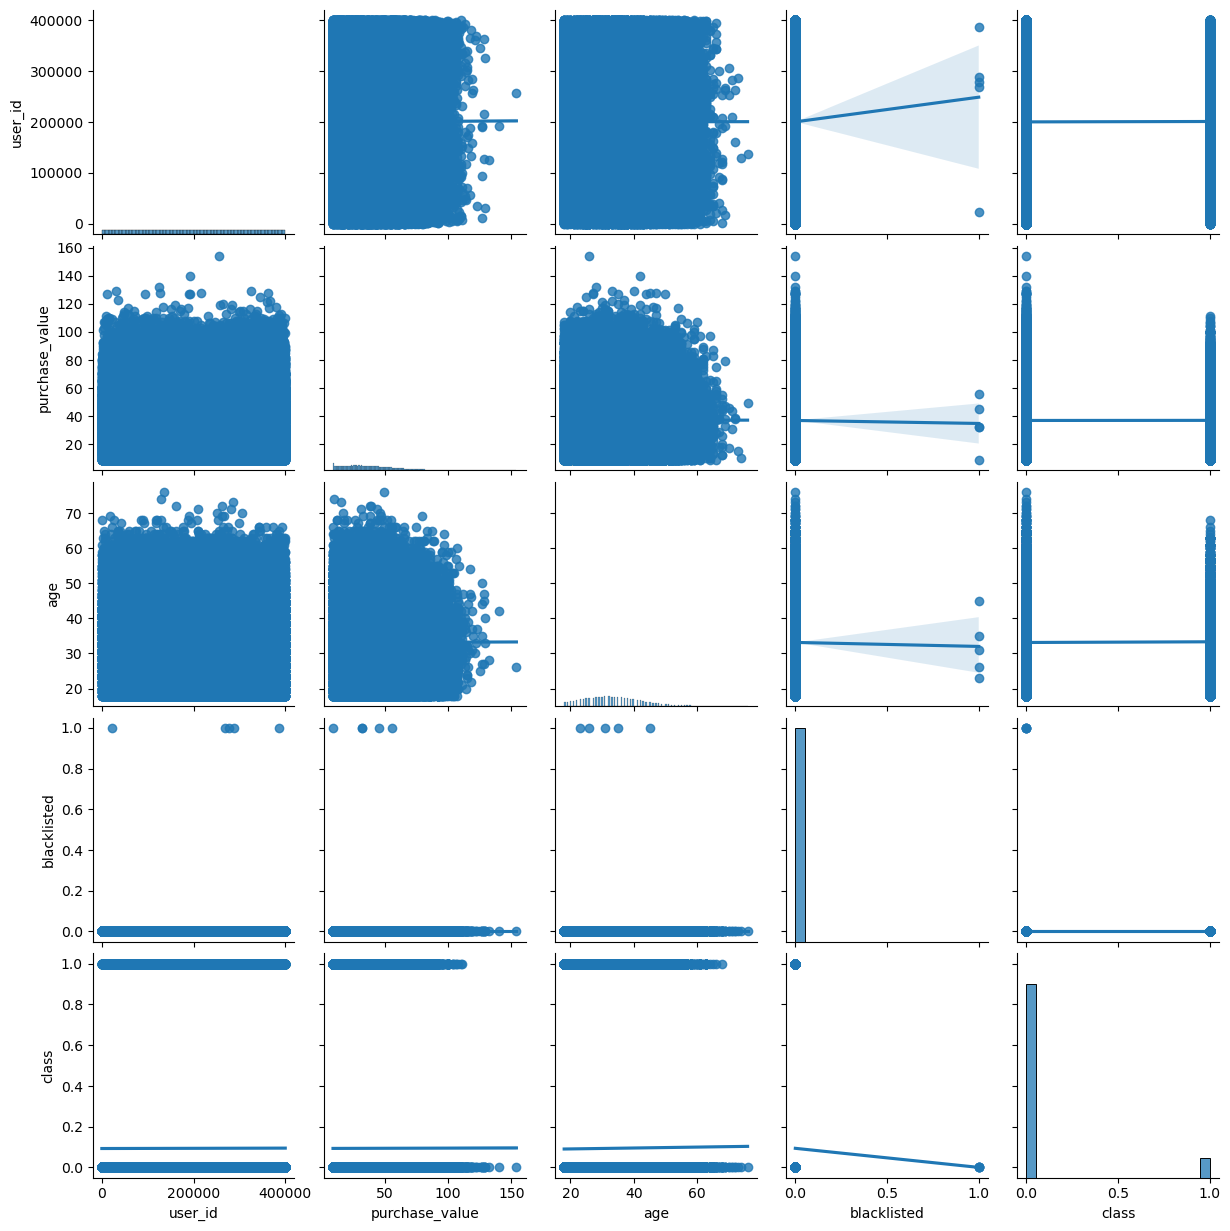

In [12]:
sns.pairplot(df, kind='reg')

In [13]:
print("----------------Browser and Count------------------")
print(df['browser'].value_counts())
print(" ")

print("----------------Sex and Count------------------")
print(df['sex'].value_counts())
print(" ")

print("----------------Country and Count------------------")
print(df['country'].value_counts())
print(" ")

----------------Browser and Count------------------
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64
 
----------------Sex and Count------------------
M    88293
F    62819
Name: sex, dtype: int64
 
----------------Country and Count------------------
United States     58049
Unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Myanmar               1
Vanuatu               1
Dominica              1
Niger                 1
Guadeloupe            1
Name: country, Length: 182, dtype: int64
 


In [14]:
# convert the 'signup_time' and 'purchase_time' columns to datetime format
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Time difference between Purchase and Signup
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.seconds
time_diff = (df['purchase_time'] - df['signup_time']).dt.seconds

# Calculate the total purchase for each device_id
total_purchase = df.groupby('device_id')['purchase_value'].sum()
df['total_purchase'] = df['device_id'].map(total_purchase)

# Create the "week-of-the-day" and "week-of-the-year" features for purchase_time
df['purchase_weekday'] = df['purchase_time'].apply(lambda x: datetime.strftime(x, '%A'))
df['purchase_week'] = df['purchase_time'].apply(lambda x: x.week)
df = df.drop(['signup_time', 'purchase_time'], axis=1)
df['device_id_unique'] = df.groupby('device_id')['user_id'].transform(lambda x: 0 if len(x)==1 else 1)
df['ip_address_unique'] = (df.groupby('ip_address')['user_id'].transform(lambda x: 0 if x.nunique() == 1 else 1))
df['time_diff_unique'] = df['time_diff'].apply(lambda x: 1 if x == 1 else 0)
df = df.reindex(columns=['user_id', 'purchase_value', 'device_id', 'device_id_unique', 'source', 'browser', 'sex', 'age', 'country', 'ip_address', 'ip_address_unique', 'blacklisted', 'time_diff','time_diff_unique', 'total_purchase','purchase_weekday', 'purchase_week', 'class'])
df.head()

,user_id,purchase_value,device_id,device_id_unique,source,browser,sex,age,country,ip_address,ip_address_unique,blacklisted,time_diff,time_diff_unique,total_purchase,purchase_weekday,purchase_week,class
0,22058,34,QVPSPJUOCKZAR,0,SEO,Chrome,M,39,Japan,43.173.1.96,0,0,13882,0,34,Saturday,16,0
1,333320,16,EOGFQPIZPYXFZ,0,Ads,Chrome,F,53,United States,20.225.83.219,0,0,17944,0,16,Monday,24,0
2,1359,15,YSSKYOSJHPPLJ,1,SEO,Opera,M,53,United States,156.64.132.28,1,0,1,1,180,Thursday,1,1
3,150084,44,ATGTXKYKUDUQN,0,SEO,Safari,M,41,Unknown,228.234.6.235,0,0,60085,0,44,Monday,19,0
4,221365,39,NAUITBZFJKHWW,0,Ads,Safari,M,45,United States,24.197.75.141,0,0,41461,0,39,Wednesday,37,0


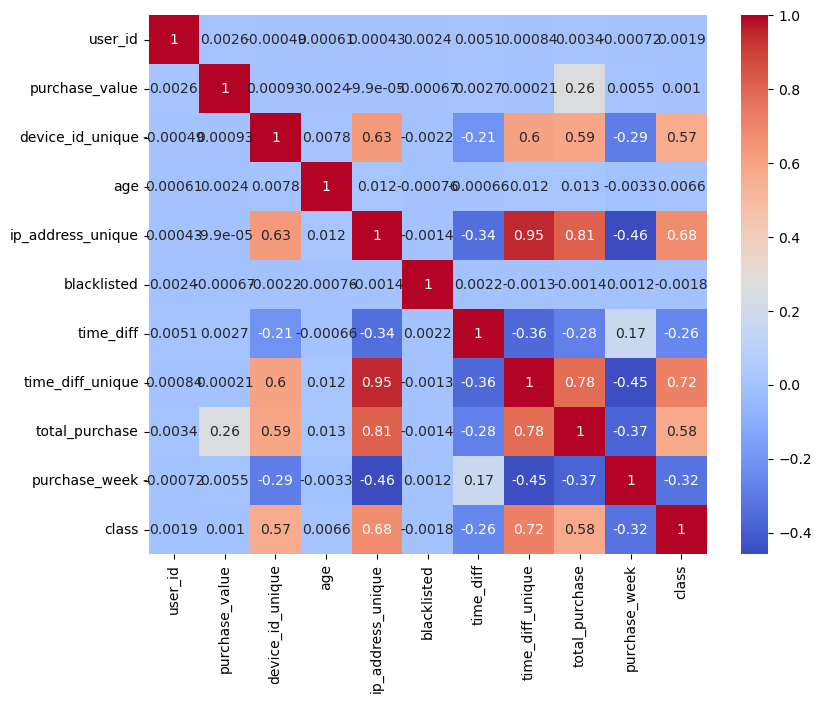

In [15]:
plt.figure(figsize=(9,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

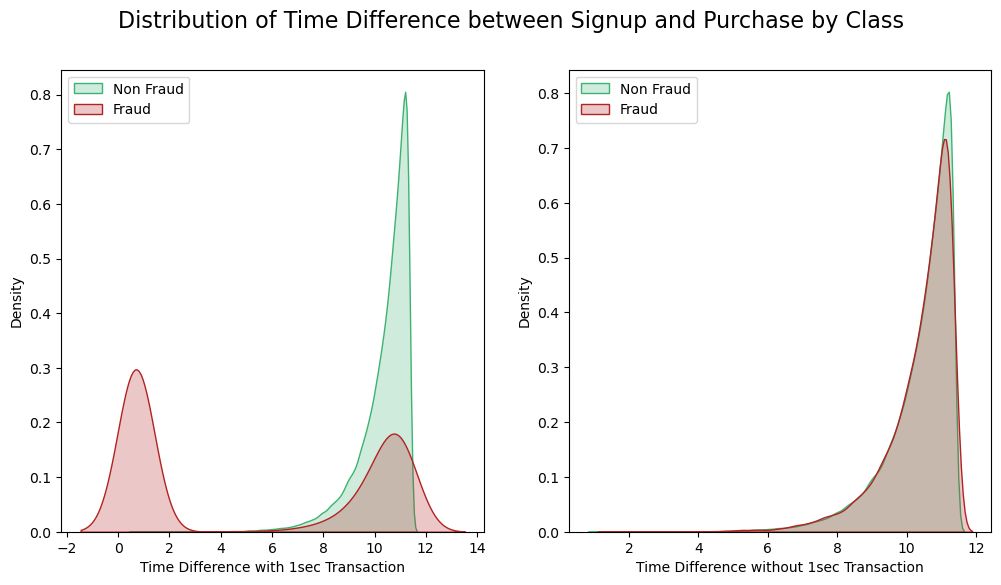

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Distribution of Time Difference between Signup and Purchase by Class', fontsize=16)

sns.kdeplot(np.log1p(df.loc[df['class']==0, 'time_diff']), label='Non Fraud', fill=True, color='mediumseagreen', ax=ax[0])
sns.kdeplot(np.log1p(df.loc[df['class']==1, 'time_diff']), label='Fraud', fill=True, color='firebrick', ax=ax[0])
ax[0].set_xlabel('Time Difference with 1sec Transaction')

sns.kdeplot(np.log1p(df.loc[(df['class']==0)&(df['time_diff']!=1), 'time_diff']), label='Non Fraud', fill=True, color='mediumseagreen', ax=ax[1])
sns.kdeplot(np.log1p(df.loc[(df['class']==1)&(df['time_diff']!=1), 'time_diff']), label='Fraud', fill=True, color='firebrick', ax=ax[1])
ax[1].set_xlabel('Time Difference without 1sec Transaction')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')


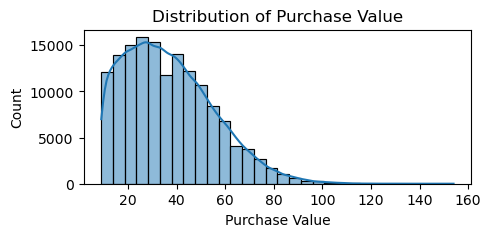

In [17]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(data=df, x='purchase_value', kde=True, bins=30, ax=ax);
plt.xlabel("Purchase Value")
plt.ylabel("Count")
plt.title("Distribution of Purchase Value")
plt.show()

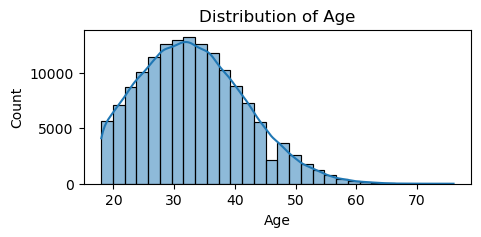

In [18]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(data=df, x='age', kde=True, bins=30, ax=ax);
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

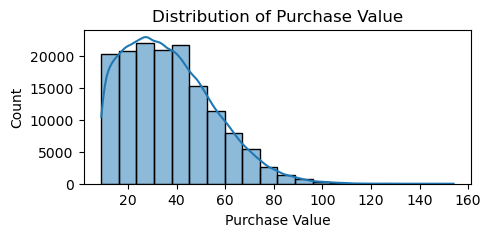

In [19]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(data=df, x='purchase_value', kde=True, bins=20, ax=ax);
plt.xlabel("Purchase Value")
plt.ylabel("Count")
plt.title("Distribution of Purchase Value")
plt.show()

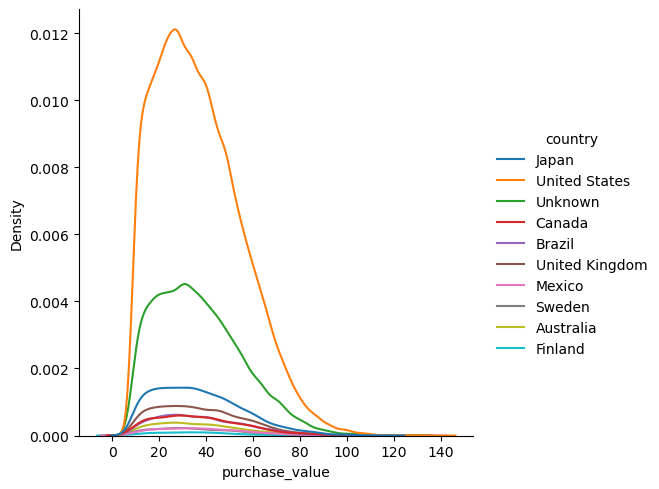

In [20]:
high_risk_countries = df[['country', 'class']].sort_values('class', ascending=False).head(20)['country'].values
sns.displot(data=df[df.country.isin(high_risk_countries)],
            x='purchase_value', hue='country', kind='kde')

In [21]:
filt = time_diff == 1
df_1 = df[filt].reset_index(drop=True)
df_not_1 = df[~filt].reset_index(drop=True)
print("----------------Shape of Time Difference 1------------------")
print(df_1.shape)
print(" ")
print("----------------Shape of Time Difference not 1------------------")
print(df_not_1.shape)
print(" ")
print("----------------Unique Values of Time Difference 1------------------")
print(df_1.nunique())
print(" ")
print("----------------Unique Values of Time Difference not 1------------------")
print(df_not_1.nunique())
print(" ")
print("----------------One second purchase data has lots of repeating IP addresses.------------------")
df_1['ip_address'].value_counts()

----------------Shape of Time Difference 1------------------
(7602, 18)
 
----------------Shape of Time Difference not 1------------------
(143510, 18)
 
----------------Unique Values of Time Difference 1------------------
user_id              7602
purchase_value         80
device_id             762
device_id_unique        2
source                  3
browser                 5
sex                     2
age                    44
country                60
ip_address            762
ip_address_unique       2
blacklisted             1
time_diff               1
time_diff_unique        1
total_purchase        344
purchase_weekday        7
purchase_week           5
class                   2
dtype: int64
 
----------------Unique Values of Time Difference not 1------------------
user_id              143510
purchase_value          122
device_id            137955
device_id_unique          2
source                    3
browser                   5
sex                       2
age                      

89.147.48.115      19
230.244.27.241     19
34.85.253.200      19
122.63.57.176      19
107.29.25.29       18
                   ..
106.118.160.152     2
136.210.224.83      2
104.120.218.255     1
200.147.70.209      1
226.190.146.179     1
Name: ip_address, Length: 762, dtype: int64

In [22]:
# Label Encoder
le = LabelEncoder()
df['device_id'] = le.fit_transform(df['device_id'])
df['source'] = le.fit_transform(df['source'])
df['browser'] = le.fit_transform(df['browser'])
df['sex'] = le.fit_transform(df['sex'])
df['ip_address'] = le.fit_transform(df['ip_address'])
df['country'] = le.fit_transform(df['country'])
df['purchase_weekday'] = le.fit_transform(df['purchase_weekday'])
df.head()

,user_id,purchase_value,device_id,device_id_unique,source,browser,sex,age,country,ip_address,ip_address_unique,blacklisted,time_diff,time_diff_unique,total_purchase,purchase_weekday,purchase_week,class
0,22058,34,89215,0,2,0,1,39,84,109404,0,0,13882,0,34,2,16,0
1,333320,16,24078,0,0,0,0,53,171,62432,0,0,17944,0,16,1,24,0
2,1359,15,131216,1,2,3,1,53,171,35637,1,0,1,1,180,4,1,1
3,150084,44,3977,0,2,4,1,41,172,80386,0,0,60085,0,44,1,19,0
4,221365,39,68757,0,0,4,1,45,171,87814,0,0,41461,0,39,6,37,0


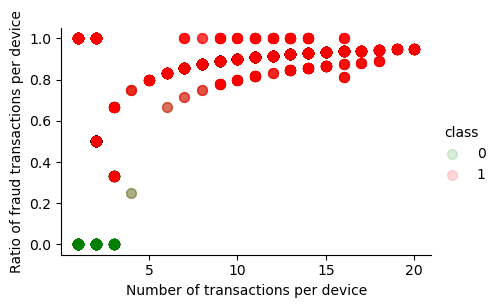

In [23]:
def calculate_ratio_fraud(df, sel_var):
    tmp = df.groupby([sel_var, 'class']).user_id.nunique()\
    .unstack(level = 1)\
    .reset_index()\
    .rename(columns = {0:'Not Fraud', 1: 'Fraud'}).fillna(0.0)
    tmp['ratio_fraud_' + sel_var] = tmp['Fraud']/(tmp['Fraud'] + tmp['Not Fraud'])
    tmp['num_trans_' + sel_var] = tmp['Fraud'] + tmp['Not Fraud']
    return df[['user_id', sel_var, 'class']]\
            .merge(tmp[[sel_var, 'ratio_fraud_' + sel_var, 'num_trans_' + sel_var]], on = sel_var)
fraud_by_dev = calculate_ratio_fraud(df, 'device_id')
fg = sns.FacetGrid(data=fraud_by_dev, hue='class', aspect=1.5, palette=['green', 'red'])
fg.map(plt.scatter, 'num_trans_device_id', 'ratio_fraud_device_id', alpha = 0.15, s = 50).add_legend()
plt.xlabel('Number of transactions per device')
plt.ylabel('Ratio of fraud transactions per device');

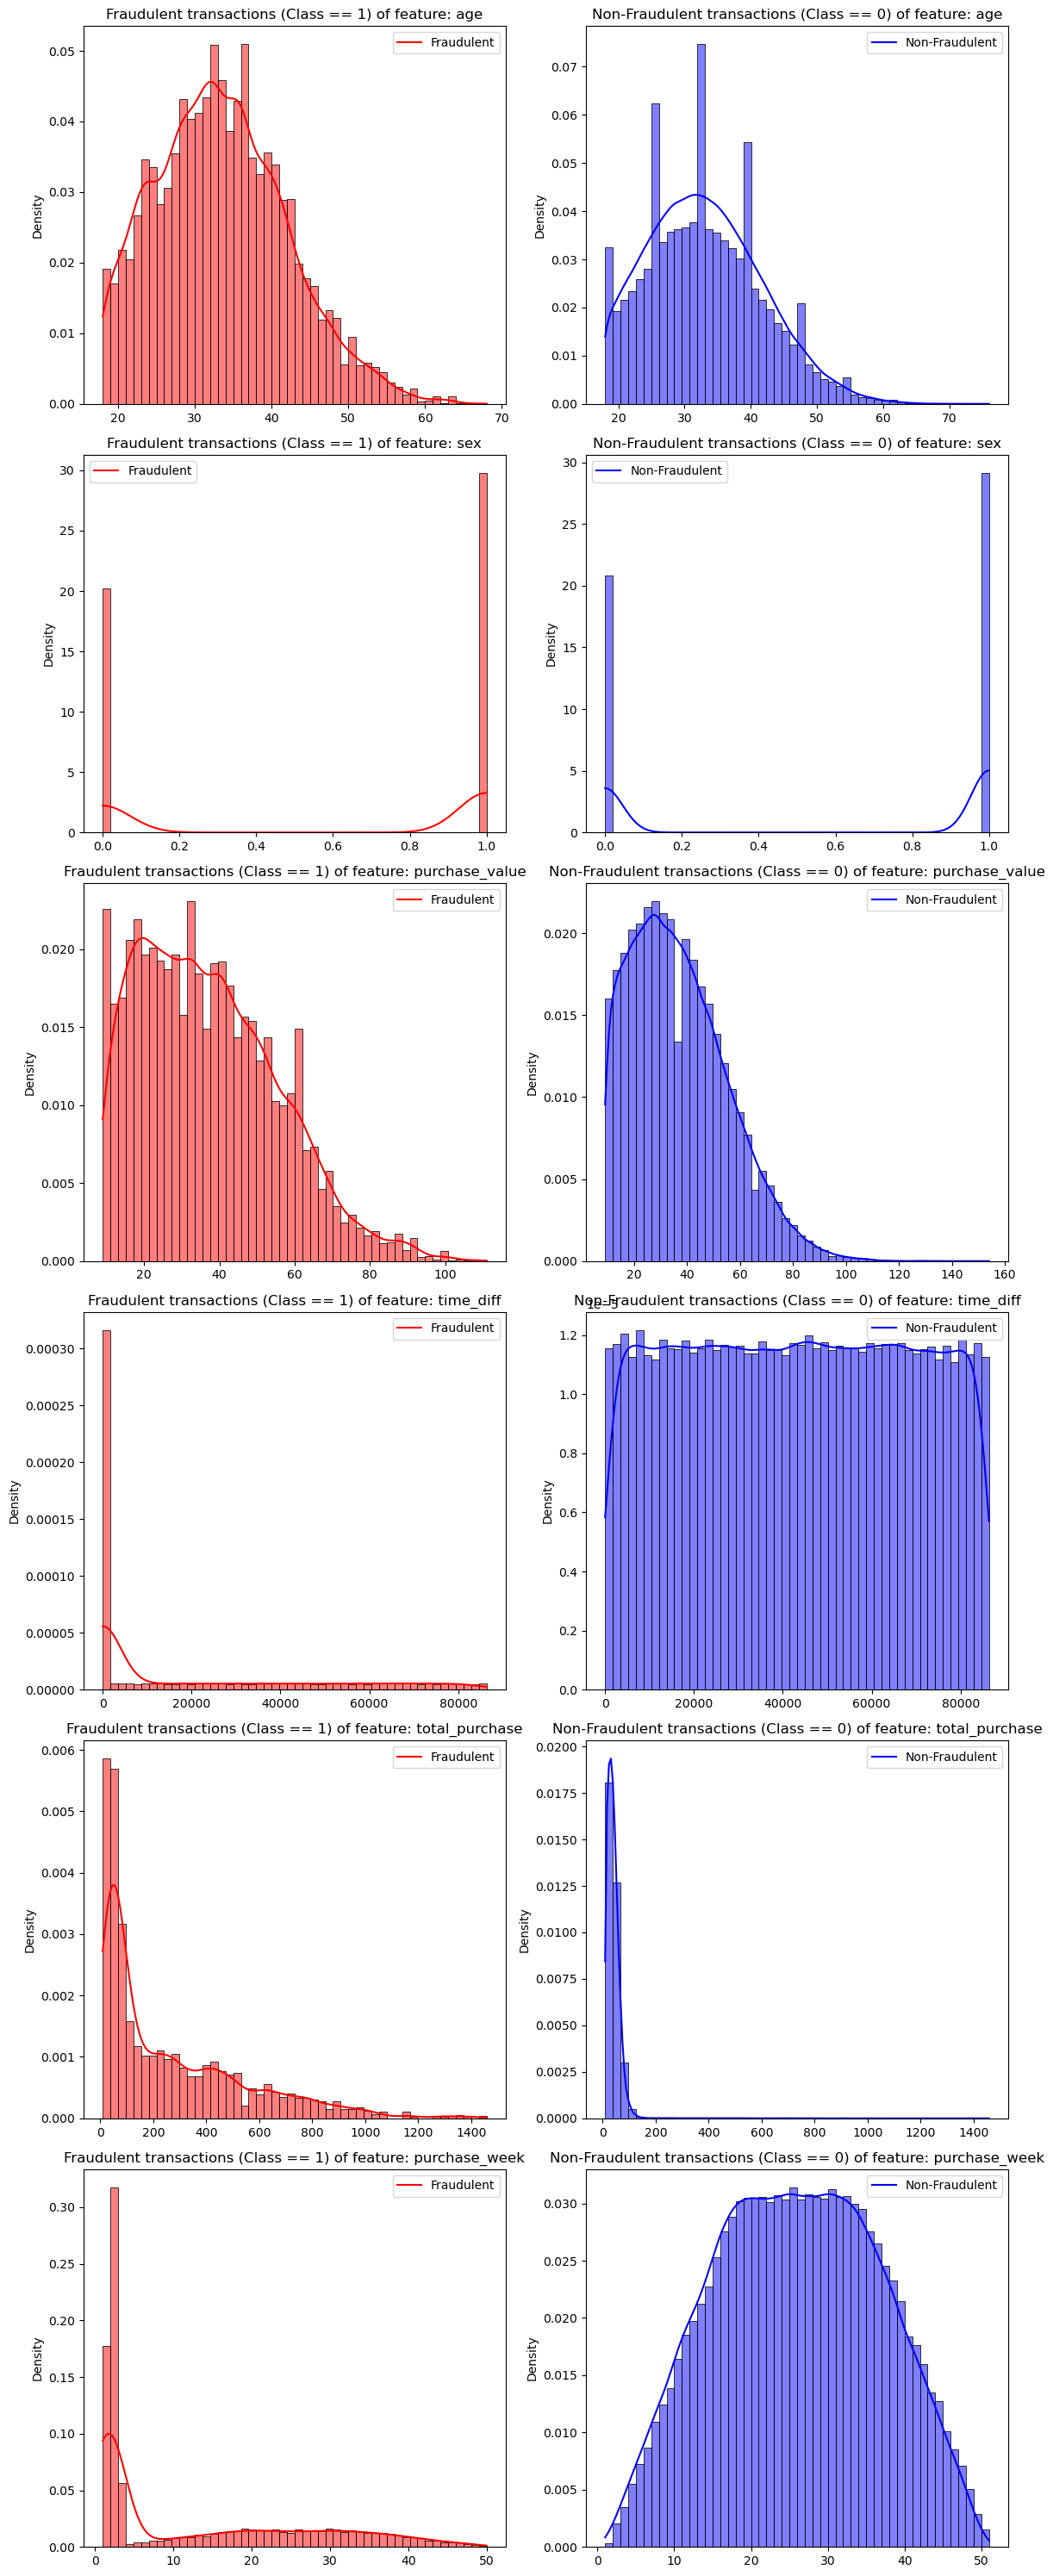

In [24]:
features = ['age', 'sex', 'purchase_value', 'time_diff', 'total_purchase','purchase_week']
bins = 50
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(12, 5*len(features)))
for i, V in enumerate(features):
    sns.histplot(df[V][df['class'] == 1], bins=bins, stat='density', kde=True, color='red', alpha=0.5, ax=axes[i,0])
    sns.histplot(df[V][df['class'] == 0], bins=bins, stat='density', kde=True, color='blue', alpha=0.5, ax=axes[i,1])
    axes[i,0].set_xlabel('')
    axes[i,1].set_xlabel('')
    axes[i,0].set_ylabel('Density')
    axes[i,1].set_ylabel('Density')
    axes[i,0].set_title('Fraudulent transactions (Class == 1) of feature: ' + str(V))
    axes[i,1].set_title('Non-Fraudulent transactions (Class == 0) of feature: ' + str(V))
    axes[i,0].legend(['Fraudulent'])
    axes[i,1].legend(['Non-Fraudulent'])
fig.tight_layout()
plt.show()


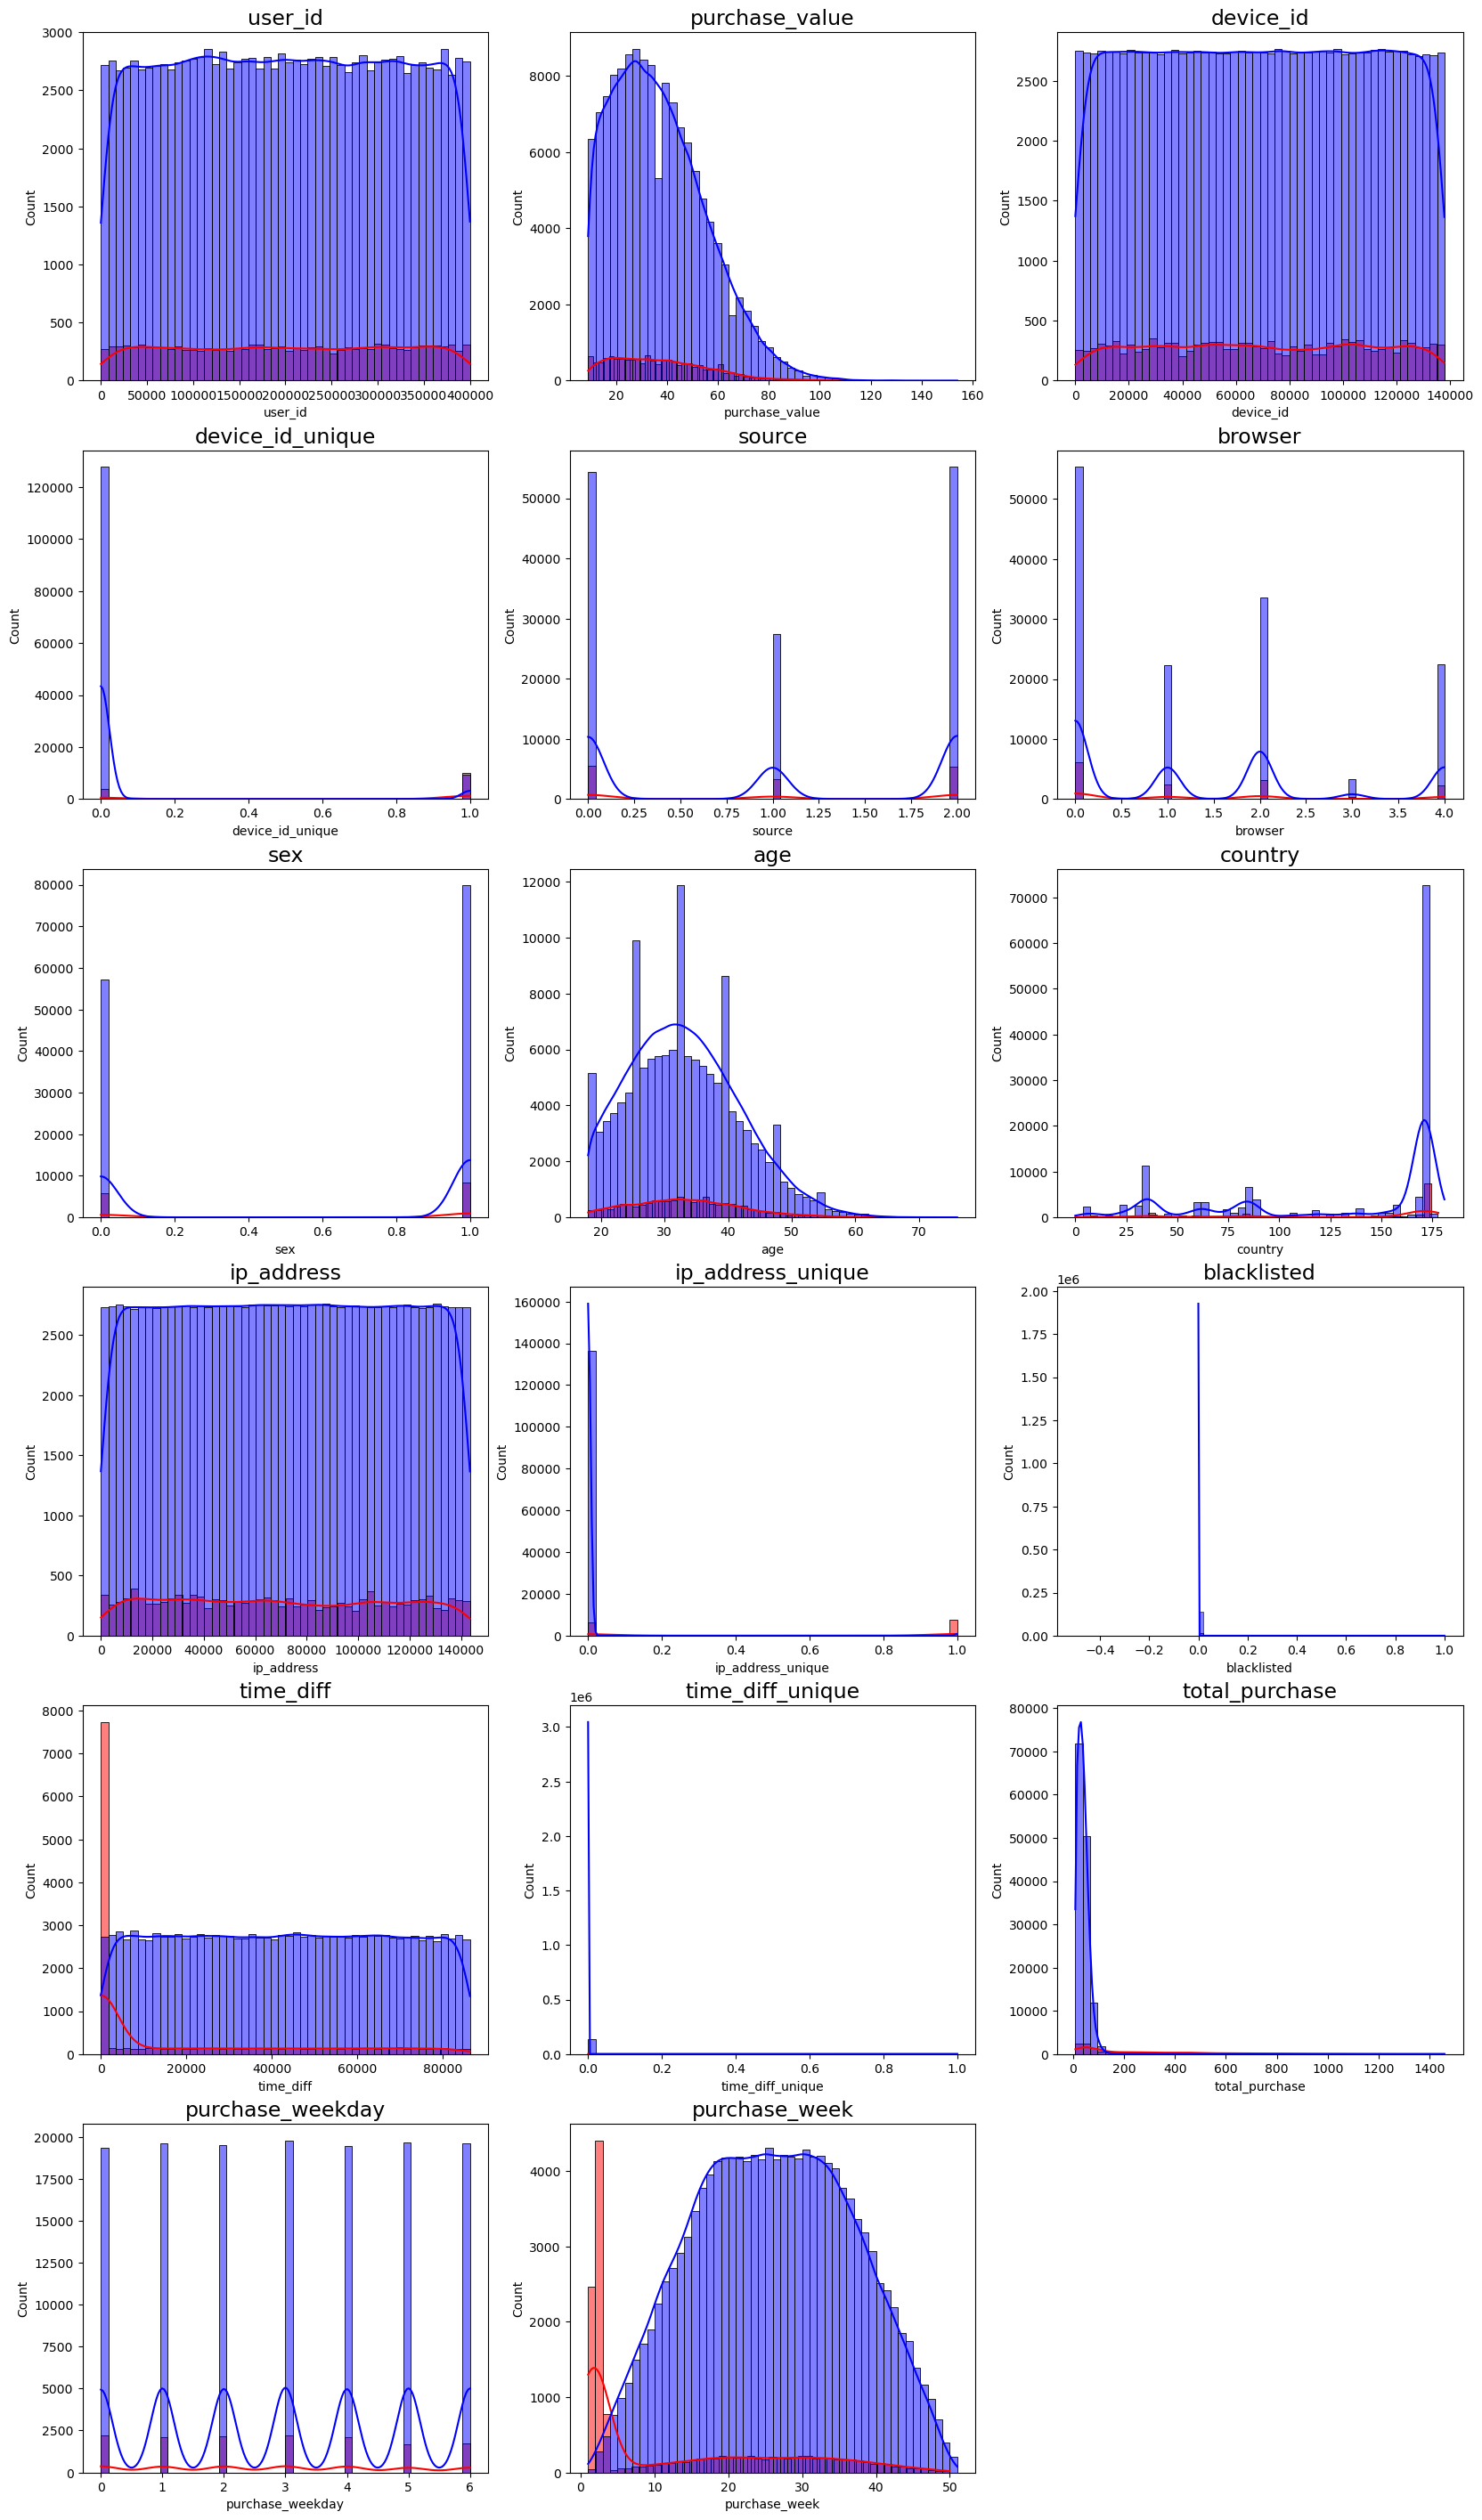

In [25]:
normal_records = df['class'] == 0
fraud_records = df['class'] == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('class', axis=1).columns):
    plt.subplot(10, 3, n+1)
    sns.histplot(df[col][fraud_records], bins=50, color='red', alpha=0.5, kde=True)
    sns.histplot(df[col][normal_records], bins=50, color='blue', alpha=0.5, kde=True)
    plt.title(col, fontsize=17)
plt.show()

In [26]:
# Standardize the numeric features
numeric_cols = ['purchase_value', 'age', 'total_purchase', 'time_diff']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,user_id,purchase_value,device_id,device_id_unique,source,browser,sex,age,country,ip_address,ip_address_unique,blacklisted,time_diff,time_diff_unique,total_purchase,purchase_weekday,purchase_week,class
0,22058,-0.160204,89215,0,2,0,1,0.679914,84,109404,0,0,-1.038811,0,-0.249985,2,16,0
1,333320,-1.142592,24078,0,0,0,0,2.304476,171,62432,0,0,-0.882878,0,-0.408448,1,24,0
2,1359,-1.197169,131216,1,2,3,1,2.304476,171,35637,1,0,-1.571680,1,1.035319,4,1,1
3,150084,0.385567,3977,0,2,4,1,0.911994,172,80386,0,0,0.734846,0,-0.161951,1,19,0
4,221365,0.112681,68757,0,0,4,1,1.376155,171,87814,0,0,0.019901,0,-0.205968,6,37,0


In [27]:
# One Hot Encoding
columns_to_encode = ['source', 'browser', 'sex', 'purchase_weekday', 'country', 'device_id_unique', 'ip_address_unique', 'time_diff_unique'] #,'country'
df = pd.get_dummies(df, columns=columns_to_encode)
df.head()

,user_id,purchase_value,device_id,age,ip_address,blacklisted,time_diff,total_purchase,purchase_week,class,...,country_178,country_179,country_180,country_181,device_id_unique_0,device_id_unique_1,ip_address_unique_0,ip_address_unique_1,time_diff_unique_0,time_diff_unique_1
0,22058,-0.160204,89215,0.679914,109404,0,-1.038811,-0.249985,16,0,...,0,0,0,0,1,0,1,0,1,0
1,333320,-1.142592,24078,2.304476,62432,0,-0.882878,-0.408448,24,0,...,0,0,0,0,1,0,1,0,1,0
2,1359,-1.197169,131216,2.304476,35637,0,-1.571680,1.035319,1,1,...,0,0,0,0,0,1,0,1,0,1
3,150084,0.385567,3977,0.911994,80386,0,0.734846,-0.161951,19,0,...,0,0,0,0,1,0,1,0,1,0
4,221365,0.112681,68757,1.376155,87814,0,0.019901,-0.205968,37,0,...,0,0,0,0,1,0,1,0,1,0


In [28]:
df = df.drop(['user_id', 'device_id','user_id', 'ip_address','blacklisted', 'device_id'], axis=1)
# Below data includes best features with feature engineering and preproceesing done, used to pass to models and test scores 
df.to_csv('Best_Features_Final_Fraud_Data.csv', index=False)
df

,purchase_value,age,time_diff,total_purchase,purchase_week,class,source_0,source_1,source_2,browser_0,...,country_178,country_179,country_180,country_181,device_id_unique_0,device_id_unique_1,ip_address_unique_0,ip_address_unique_1,time_diff_unique_0,time_diff_unique_1
0,-0.160204,0.679914,-1.038811,-0.249985,16,0,0,0,1,1,...,0,0,0,0,1,0,1,0,1,0
1,-1.142592,2.304476,-0.882878,-0.408448,24,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,-1.197169,2.304476,-1.571680,1.035319,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,0.385567,0.911994,0.734846,-0.161951,19,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,0.112681,1.376155,0.019901,-0.205968,37,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0.330990,-0.596528,1.393129,0.110956,13,1,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
151108,-0.105627,-0.132367,1.010666,-0.241182,22,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
151109,0.167258,-0.828608,-0.465519,-0.197165,21,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
151110,0.494721,0.447833,0.290846,0.295829,37,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
